# UAS Model Deployment

## Importing Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

## Loading Dataset

###### a. Gender = Laki-laki atau Wanita
###### b. Age = Usia seseorang dalam tahun
###### c. Height = Tinggi dalam meter
###### d. Weight = Berat dalam kilogram
###### e. family_history_with_overweight = Apakah orang tersebut memiliki riwayat keluarga dengan kelebihan berat badan
###### f. FAVC = Jika orang tersebut sering mengonsumsi makanan berkalori tinggi (ya/tidak)
###### g. FCVC = Frekuensi konsumsi sayuran (skala dari 1 hingga 3)
###### h. NCP = Jumlah makanan utama per hari
###### i. CAEC = Frekuensi mengonsumsi makanan di antara waktu makan (Tidak pernah, Kadang-kadang,Sering, Selalu)
###### j. SMOKE = Apakah orang tersebut merokok (ya/tidak)
###### k. CH2O = Asupan air harian (skala dari 1 hingga 3)
###### l. SCC = Jika orang tersebut memantau asupan kalori mereka (ya/tidak)
###### m. FAF = Frekuensi aktivitas fisik (skala dari 0 hingga 3)
###### n. TUE = Waktu yang dihabiskan untuk menggunakan teknologi (skala dari 0 hingga 3)
###### o. CALC = Frekuensi konsumsi alkohol (Tidak pernah, Kadang-kadang, Sering, Selalu)
###### p. MTRANS = Moda transportasi utama (Mobil, Sepeda, Sepeda Motor, Transportasi Umum, Jalan Kaki)
###### q. NObeyesedad = Tingkat obesitas (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III)


In [31]:
df = pd.read_csv('C:/Users/ben/Documents/Programming/Python/Python Binus/Model Deployment/UAS/ObesityDataSet2.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,Female,21,1.74,130.93,yes,yes,3.00,3.00,Sometimes,no,1.85,no,1.46,0.962,Sometimes,Public_Transportation,Obesity_Type_III
1052,Female,17,1.54,57.26,no,yes,1.97,2.34,Sometimes,no,1.71,yes,0.10,1.191,Sometimes,Public_Transportation,Overweight_Level_I
1053,Female,19,1.60,45.00,no,no,3.00,3.00,no,no,3.00,yes,2.00,0.000,no,Walking,Insufficient_Weight
1054,Female,25,1.69,113.45,yes,yes,3.00,3.00,Sometimes,no,2.99,no,0.39,0.284,Sometimes,Public_Transportation,Obesity_Type_III


## Basic Data Inspection

##### Displaying the first 5 rows of the dataset

In [32]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


##### Checking the data type and non-null variable counts of each features

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

##### Statistical summary of the dataset for numerical features

In [34]:
df.describe()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1056.000000,1056.000000,1019.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,1.700066,86.497633,2.421374,2.651686,1.998002,0.987528,0.642227
std,0.091560,26.181219,0.537591,0.804457,0.612930,0.850452,0.615533
min,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.630000,66.000000,2.000000,2.525000,1.530000,0.110000,0.000000
50%,1.700000,82.635000,2.390000,3.000000,2.000000,1.000000,0.583000
75%,1.760000,107.965000,3.000000,3.000000,2.442500,1.602500,1.000000
max,1.950000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


##### Checking for duplicated data in the dataset

In [35]:
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
96,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
227,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
285,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
326,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
436,Female,22,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
558,Female,18,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
701,Female,21,1.52,42.0,no,yes,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
949,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
960,Female,16,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
996,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I


##### Checking for missing values count and percentage, Data type, Unique values of all features

In [36]:
missing_values_count = df.isnull().sum()
missing_values_percentage = df.isnull().mean() * 100
data_types = df.dtypes
unique_values_count = df.nunique()

summary = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage of Missing Values': missing_values_percentage,
    'Data Type': data_types,
    'Unique Values': unique_values_count
})
summary

,Missing Values,Percentage of Missing Values,Data Type,Unique Values
Gender,0,0.000000,object,2
Age,0,0.000000,object,46
Height,0,0.000000,float64,47
Weight,0,0.000000,float64,715
family_history_with_overweight,0,0.000000,object,2
FAVC,0,0.000000,object,2
FCVC,37,3.503788,float64,147
NCP,0,0.000000,float64,194
CAEC,0,0.000000,object,4
SMOKE,0,0.000000,object,2


##### Renaming columns for better understanding

In [ ]:
df.columns = ['Gender', 'Age', 'Height_in_m', 'Weight_in_kg', 'family_history_with_overweight','High_calorie_diet', 'Frequency_vegetable_consumption',
              'main_course_per_day', 'Food_consumption_interval', 'Smoking', 'Daily_water_intake', 'Count_Calorie_intake', 'Physical_activity_frequency',
              'Time_spent_on_tech', 'Alcohol_Consumption_Frequency', 'Main_Transportation', 'Obesity_level']
 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           1056 non-null   object 
 1   Age                              1056 non-null   object 
 2   Height_in_m                      1056 non-null   float64
 3   Weight_in_kg                     1056 non-null   float64
 4   family_history_with_overweight   1056 non-null   object 
 5   High_calorie_diet                1056 non-null   object 
 6   Frequency_vegetable_consumption  1019 non-null   float64
 7   main_course_per_day              1056 non-null   float64
 8   Food_consumption_interval        1056 non-null   object 
 9   Smoking                          1056 non-null   object 
 10  Daily_water_intake               1056 non-null   float64
 11  Count_Calorie_intake             1056 non-null   object 
 12  Physical_activity_fr

In [ ]:
df['Age'] = df['Age'].str.extract('(\d+)')  # Extract digits
df['Age'] = df['Age'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           1056 non-null   object 
 1   Age                              1056 non-null   float64
 2   Height_in_m                      1056 non-null   float64
 3   Weight_in_kg                     1056 non-null   float64
 4   family_history_with_overweight   1056 non-null   object 
 5   High_calorie_diet                1056 non-null   object 
 6   Frequency_vegetable_consumption  1019 non-null   float64
 7   main_course_per_day              1056 non-null   float64
 8   Food_consumption_interval        1056 non-null   object 
 9   Smoking                          1056 non-null   object 
 10  Daily_water_intake               1056 non-null   float64
 11  Count_Calorie_intake             1056 non-null   object 
 12  Physical_activity_fr

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ben\AppData\Local\Temp\ipykernel_10396\2273624504.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['Age'] = df['Age'].str.extract('(\d+)')  # Extract digits


## Data Visualization

##### Target Distribution

C:\Users\ben\AppData\Local\Temp\ipykernel_10396\2850225958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Obesity_level', palette='viridis')


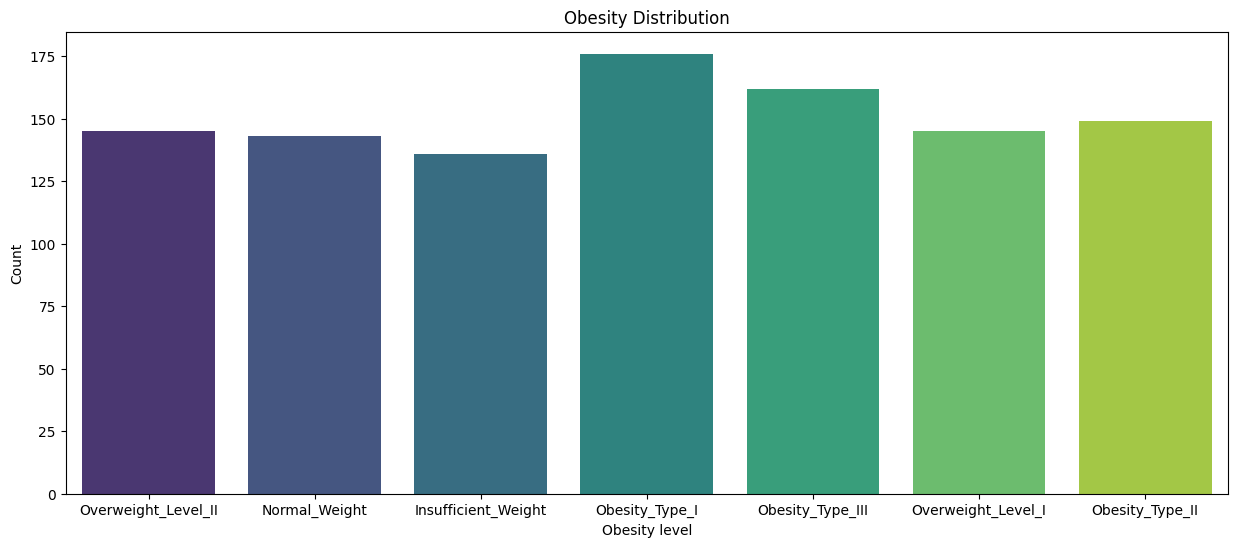

,Count,Percentage
Obesity_level,,
Obesity_Type_I,176,16.67%
Obesity_Type_III,162,15.34%
Obesity_Type_II,149,14.11%
Overweight_Level_II,145,13.73%
Overweight_Level_I,145,13.73%
Normal_Weight,143,13.54%
Insufficient_Weight,136,12.88%


In [39]:
plt.figure(figsize=(15, 6))
sns.countplot(data = df, x = 'Obesity_level', palette='viridis')
plt.title('Obesity Distribution')
plt.xlabel('Obesity level')
plt.ylabel('Count')
plt.show()

counts = df['Obesity_level'].value_counts()
percentages = (df['Obesity_level'].value_counts(normalize=True) * 100).round(2)
summary = pd.DataFrame({'Count': counts, 'Percentage': percentages.astype(str) + '%'})
summary

##### Univariate Analysis

###### Categorical Variables

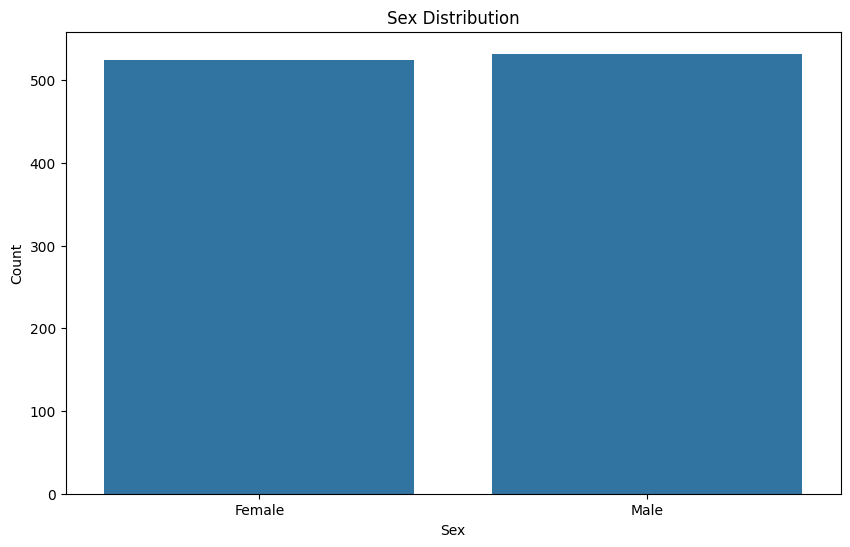

,Count,Percentage
Gender,,
Male,532,50.38%
Female,524,49.62%


In [40]:
#Gender Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Gender')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

sex_count = df['Gender'].value_counts()
sex_percentage = (df['Gender'].value_counts(normalize=True)*100).round(2)

sex_summary = pd.DataFrame({
    'Count': sex_count,
    'Percentage': sex_percentage.astype(str) + '%'
})
sex_summary

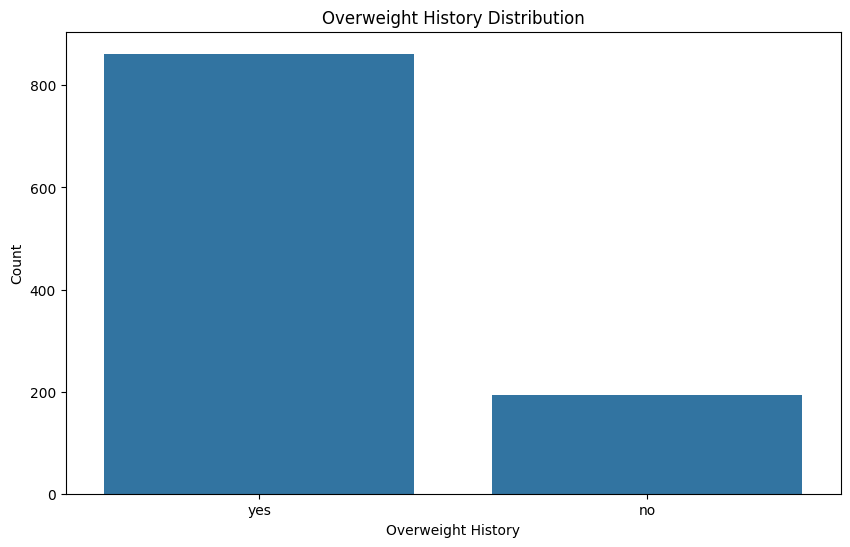

,Counts,Percentage
family_history_with_overweight,,
yes,862,81.63%
no,194,18.37%


In [41]:
#Overweight history 
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='family_history_with_overweight')
plt.title('Overweight History Distribution')
plt.xlabel('Overweight History')
plt.ylabel('Count')
plt.show()

overweight_count = df['family_history_with_overweight'].value_counts()
overweight_percentage = (df['family_history_with_overweight'].value_counts(normalize=True)*100).round(2)

overweight_summary = pd.DataFrame({
    'Counts': overweight_count,
    'Percentage': overweight_percentage.astype(str) + '%'
})
overweight_summary

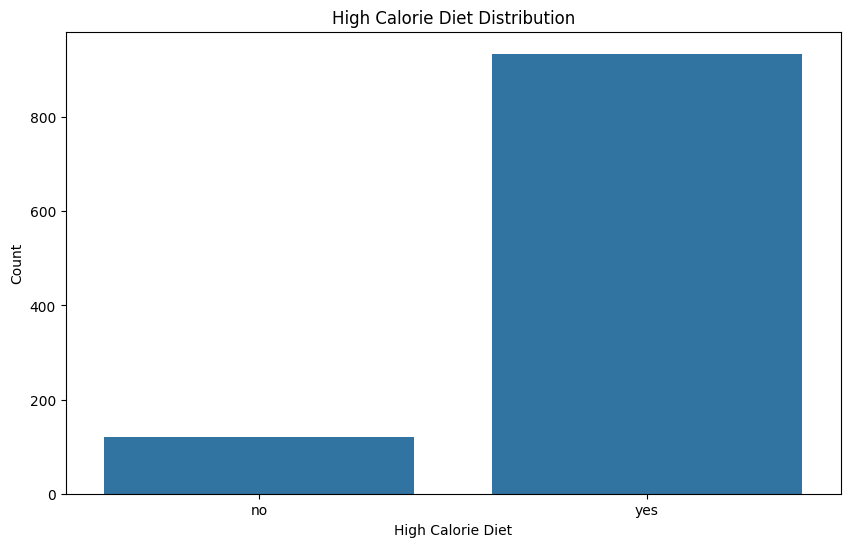

,Counts,Percentage
High_calorie_diet,,
yes,935,88.54%
no,121,11.46%


In [42]:
#Overweight history 
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='High_calorie_diet')
plt.title('High Calorie Diet Distribution')
plt.xlabel('High Calorie Diet')
plt.ylabel('Count')
plt.show()

High_calorie_diet_count = df['High_calorie_diet'].value_counts()
High_calorie_diet_percentage = (df['High_calorie_diet'].value_counts(normalize=True)*100).round(2)

High_calorie_diet_summary = pd.DataFrame({
    'Counts': High_calorie_diet_count,
    'Percentage': High_calorie_diet_percentage.astype(str) + '%'
})
High_calorie_diet_summary

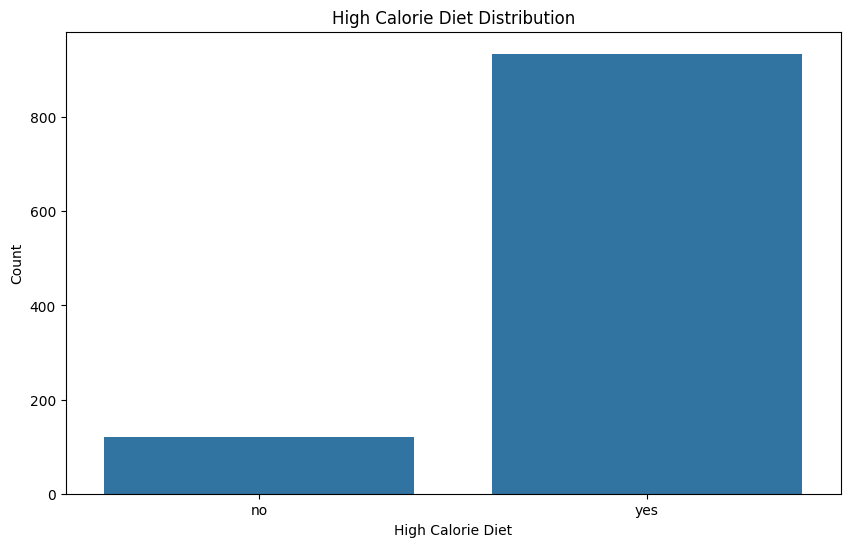

,Counts,Percentage
High_calorie_diet,,
yes,935,88.54%
no,121,11.46%


In [43]:
#Overweight history 
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='High_calorie_diet')
plt.title('High Calorie Diet Distribution')
plt.xlabel('High Calorie Diet')
plt.ylabel('Count')
plt.show()

High_calorie_diet_count = df['High_calorie_diet'].value_counts()
High_calorie_diet_percentage = (df['High_calorie_diet'].value_counts(normalize=True)*100).round(2)

High_calorie_diet_summary = pd.DataFrame({
    'Counts': High_calorie_diet_count,
    'Percentage': High_calorie_diet_percentage.astype(str) + '%'
})
High_calorie_diet_summary

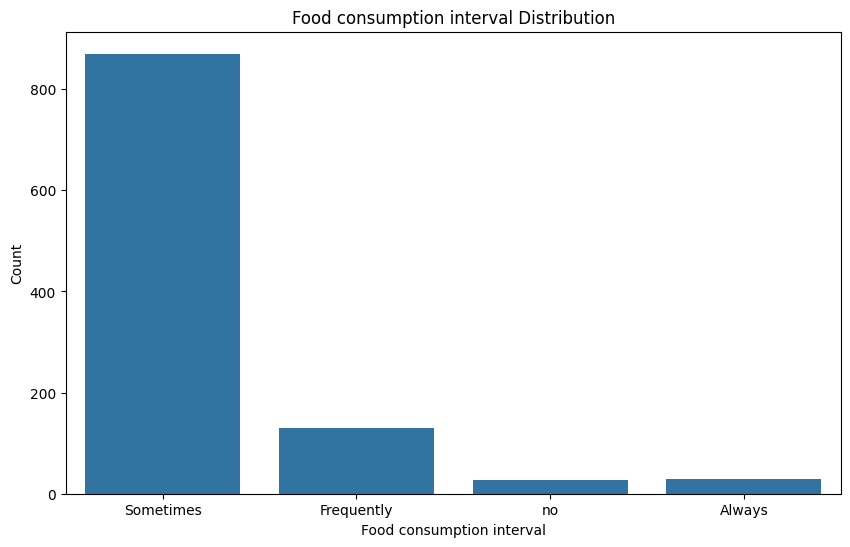

,Counts,Percentage
Food_consumption_interval,,
Sometimes,870,82.39%
Frequently,129,12.22%
Always,29,2.75%
no,28,2.65%


In [44]:
#Overweight history 
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Food_consumption_interval')
plt.title('Food consumption interval Distribution')
plt.xlabel('Food consumption interval')
plt.ylabel('Count')
plt.show()

Food_consumption_interval_count = df['Food_consumption_interval'].value_counts()
Food_consumption_interval_percentage = (df['Food_consumption_interval'].value_counts(normalize=True)*100).round(2)

Food_consumption_interval_summary = pd.DataFrame({
    'Counts': Food_consumption_interval_count,
    'Percentage': Food_consumption_interval_percentage.astype(str) + '%'
})
Food_consumption_interval_summary

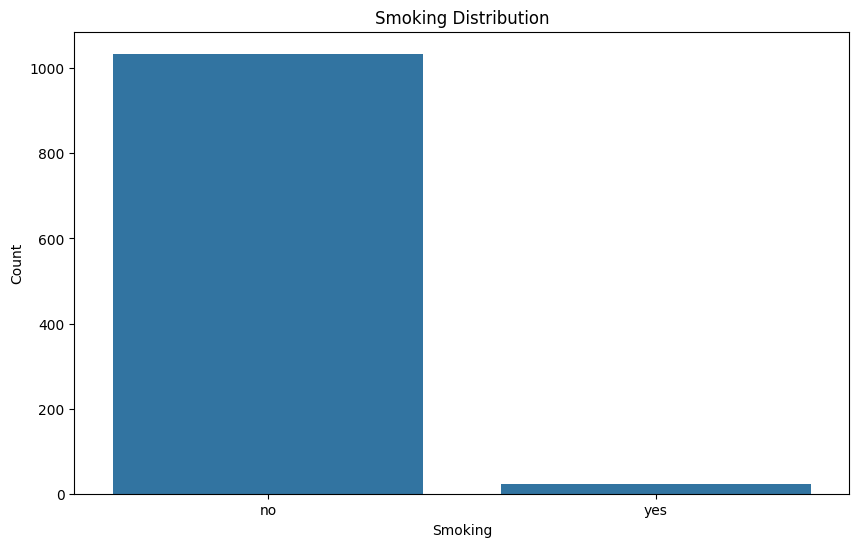

,Counts,Percentage
Smoking,,
no,1034,97.92%
yes,22,2.08%


In [45]:
#Overweight history 
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Smoking')
plt.title('Smoking Distribution')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

Smoking_count = df['Smoking'].value_counts()
Smoking_percentage = (df['Smoking'].value_counts(normalize=True)*100).round(2)

Smoking_summary = pd.DataFrame({
    'Counts': Smoking_count,
    'Percentage': Smoking_percentage.astype(str) + '%'
})
Smoking_summary

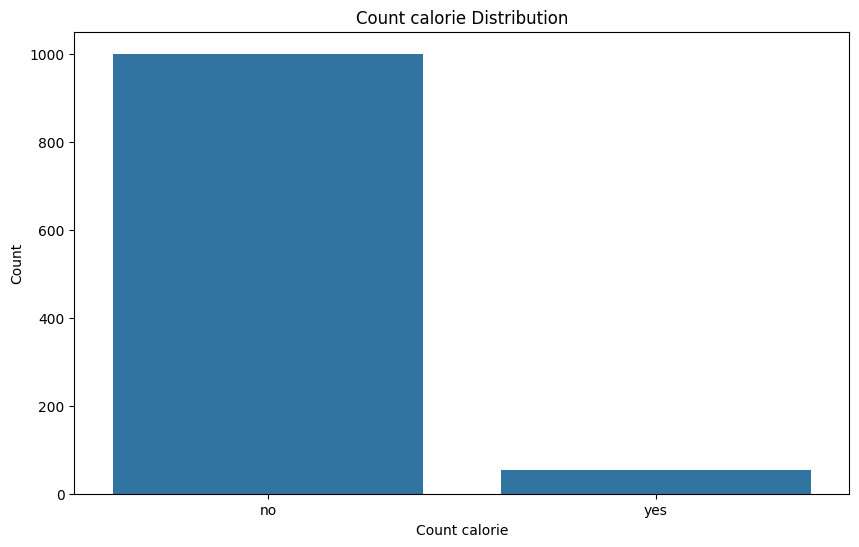

,Counts,Percentage
Count_Calorie_intake,,
no,1001,94.79%
yes,55,5.21%


In [46]:
#Overweight history 
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Count_Calorie_intake')
plt.title('Count calorie Distribution')
plt.xlabel('Count calorie')
plt.ylabel('Count')
plt.show()

Count_Calorie_intake_count = df['Count_Calorie_intake'].value_counts()
Count_Calorie_intake_percentage = (df['Count_Calorie_intake'].value_counts(normalize=True)*100).round(2)

Count_Calorie_intake_summary = pd.DataFrame({
    'Counts': Count_Calorie_intake_count,
    'Percentage': Count_Calorie_intake_percentage.astype(str) + '%'
})
Count_Calorie_intake_summary

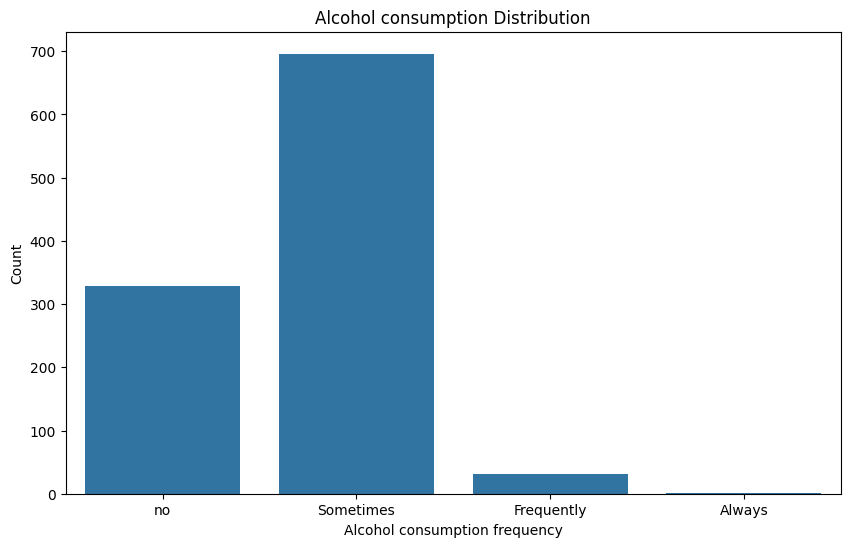

,Counts,Percentage
Alcohol_Consumption_Frequency,,
Sometimes,696,65.91%
no,328,31.06%
Frequently,31,2.94%
Always,1,0.09%


In [47]:
#Overweight history 
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Alcohol_Consumption_Frequency')
plt.title('Alcohol consumption Distribution')
plt.xlabel('Alcohol consumption frequency')
plt.ylabel('Count')
plt.show()

Alcohol_Consumption_Frequency_count = df['Alcohol_Consumption_Frequency'].value_counts()
Alcohol_Consumption_Frequency_percentage = (df['Alcohol_Consumption_Frequency'].value_counts(normalize=True)*100).round(2)

Alcohol_Consumption_Frequency_summary = pd.DataFrame({
    'Counts': Alcohol_Consumption_Frequency_count,
    'Percentage': Alcohol_Consumption_Frequency_percentage.astype(str) + '%'
})
Alcohol_Consumption_Frequency_summary

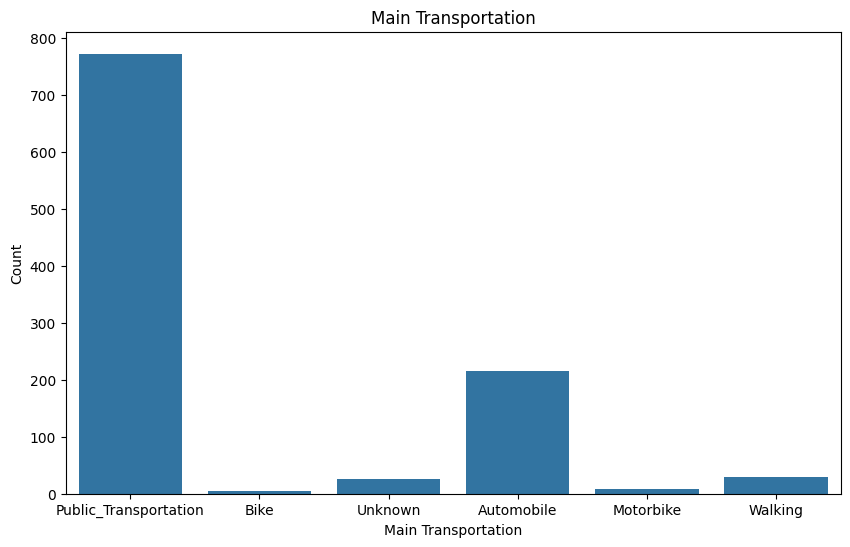

,Counts,Percentage
Main_Transportation,,
Public_Transportation,773,73.2%
Automobile,216,20.45%
Walking,29,2.75%
Unknown,26,2.46%
Motorbike,8,0.76%
Bike,4,0.38%


In [48]:
# Temporarily fill missing values in a copy of the DataFrame
df_temp = df.copy()
df_temp['Main_Transportation'] = df_temp['Main_Transportation'].fillna('Unknown')

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_temp, x='Main_Transportation')
plt.title('Main Transportation')
plt.xlabel('Main Transportation')
plt.ylabel('Count')
plt.show()

# Summary table
Main_Transportation_count = df_temp['Main_Transportation'].value_counts()
Main_Transportation_percentage = (df_temp['Main_Transportation'].value_counts(normalize=True) * 100).round(2)

Main_Transportation_summary = pd.DataFrame({
    'Counts': Main_Transportation_count,
    'Percentage': Main_Transportation_percentage.astype(str) + '%'
})

Main_Transportation_summary

###### Numerical values

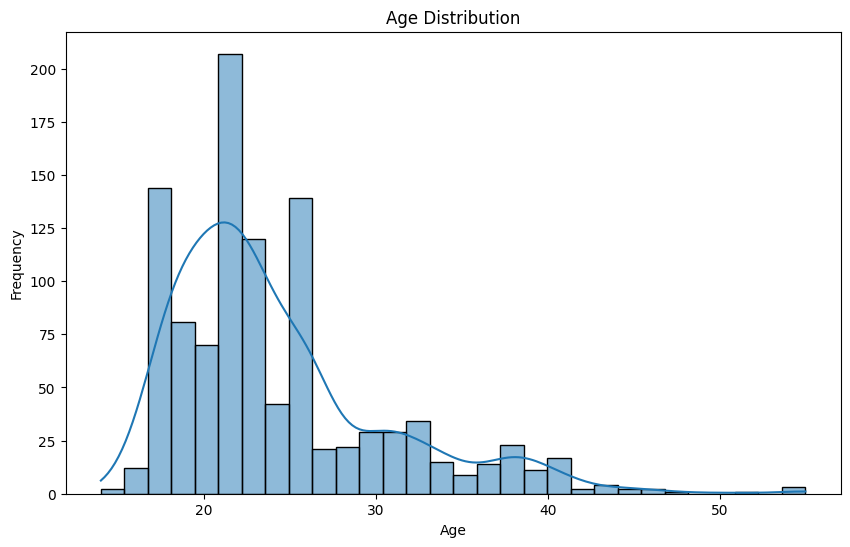

Age Skewness: 1.46


In [49]:
#Age distribution
#Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x= 'Age', kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Age_skew = skew(df['Age'].dropna())
print(f"Age Skewness: {Age_skew:.2f}")

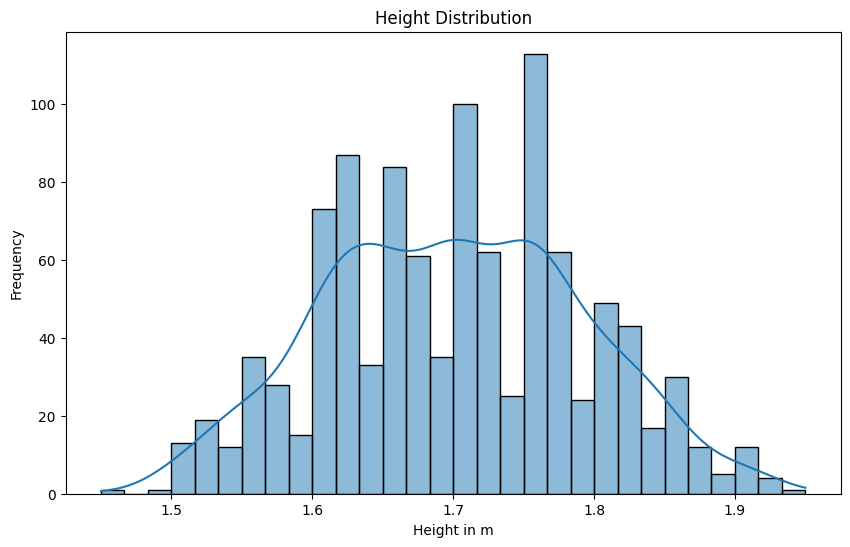

height Skewness: 0.05


In [50]:
#Age distribution
#Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x= 'Height_in_m', kde=True, bins=30)
plt.title('Height Distribution')
plt.xlabel('Height in m')
plt.ylabel('Frequency')
plt.show()

Height_in_m_skew = skew(df['Height_in_m'].dropna())
print(f"height Skewness: {Height_in_m_skew:.2f}")

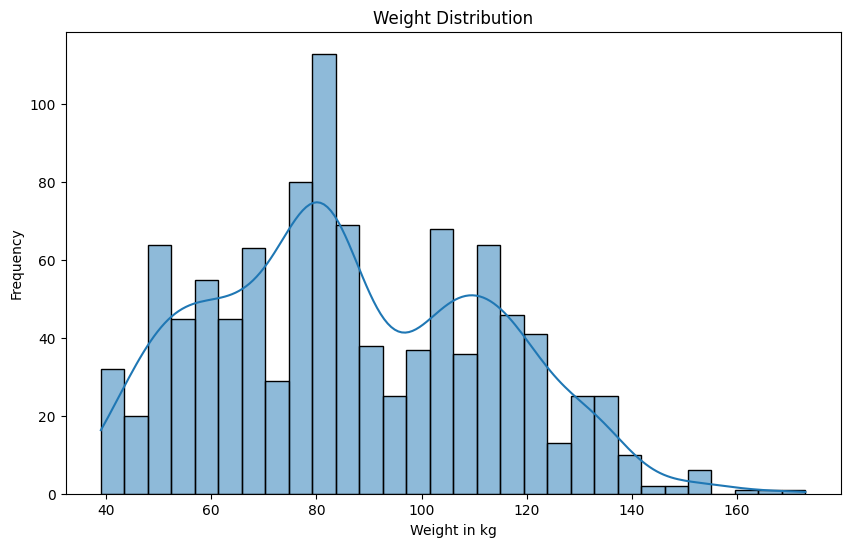

Weight Skewness: 0.27


In [51]:
#Age distribution
#Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x= 'Weight_in_kg', kde=True, bins=30)
plt.title('Weight Distribution')
plt.xlabel('Weight in kg')
plt.ylabel('Frequency')
plt.show()

Weight_in_kg_skew = skew(df['Weight_in_kg'].dropna())
print(f"Weight Skewness: {Weight_in_kg_skew:.2f}")

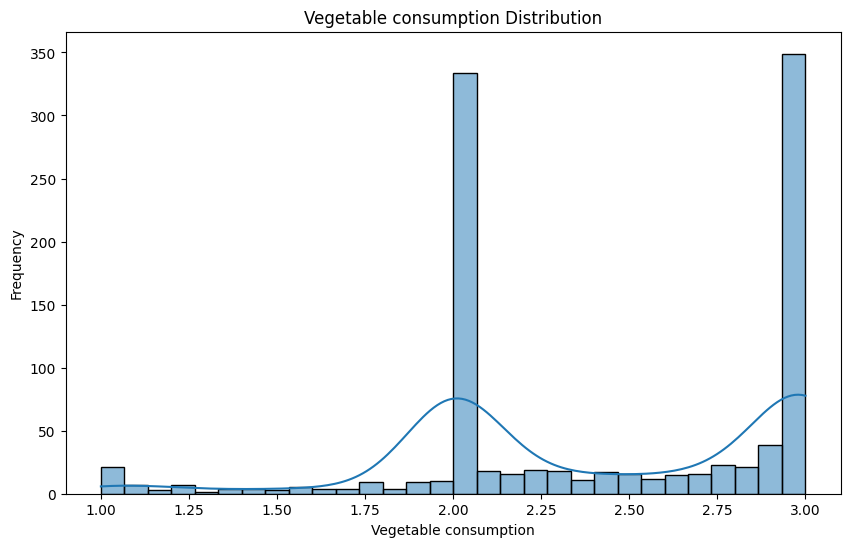

Vegetable consumption Skewness: -0.44


In [52]:
#Age distribution
#Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x= 'Frequency_vegetable_consumption', kde=True, bins=30)
plt.title('Vegetable consumption Distribution')
plt.xlabel('Vegetable consumption')
plt.ylabel('Frequency')
plt.show()

Frequency_vegetable_consumption_skew = skew(df['Frequency_vegetable_consumption'].fillna(df['Frequency_vegetable_consumption'].mean()))
print(f"Vegetable consumption Skewness: {Frequency_vegetable_consumption_skew:.2f}")

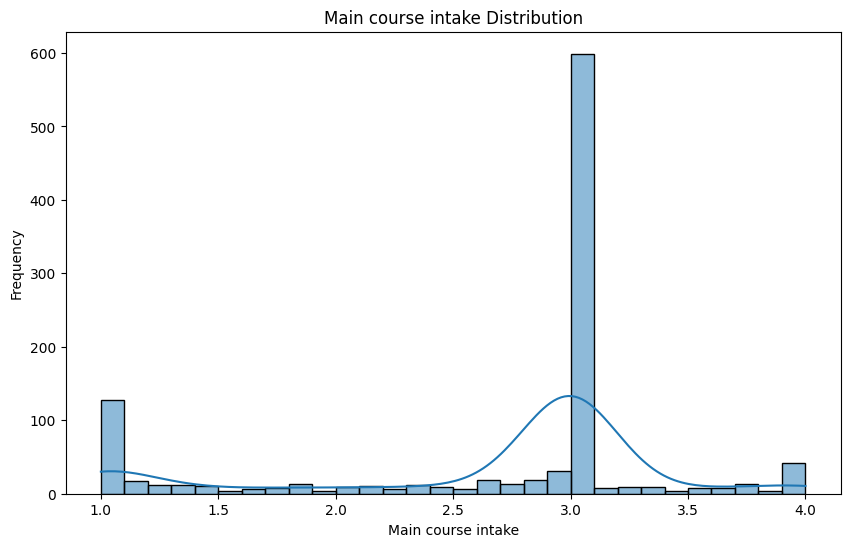

main course intake Skewness: -1.03


In [53]:
#Age distribution
#Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x= 'main_course_per_day', kde=True, bins=30)
plt.title('Main course intake Distribution')
plt.xlabel('Main course intake')
plt.ylabel('Frequency')
plt.show()

main_course_per_day_skew = skew(df['main_course_per_day'].dropna())
print(f"main course intake Skewness: {main_course_per_day_skew:.2f}")

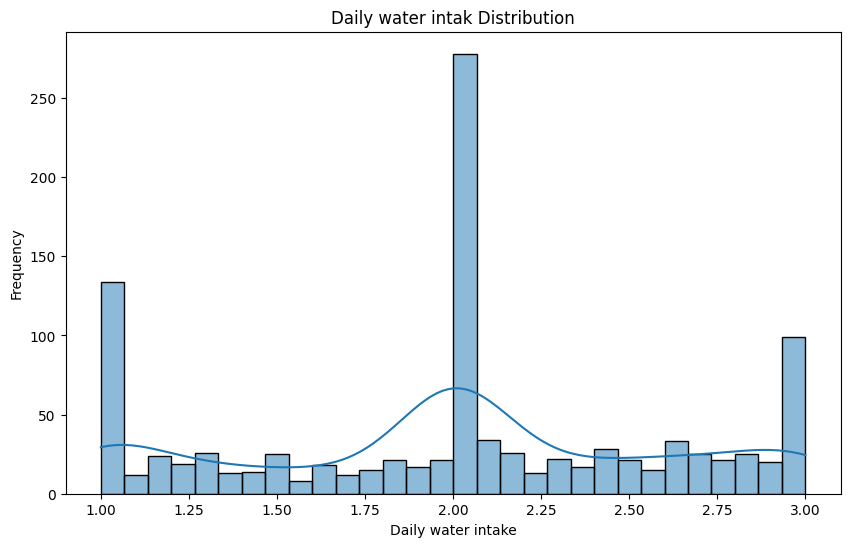

Daily water intake Skewness: -0.08


In [54]:
#Age distribution
#Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x= 'Daily_water_intake', kde=True, bins=30)
plt.title('Daily water intak Distribution')
plt.xlabel('Daily water intake')
plt.ylabel('Frequency')
plt.show()

Daily_water_intake_skew = skew(df['Daily_water_intake'].dropna())
print(f"Daily water intake Skewness: {Daily_water_intake_skew:.2f}")

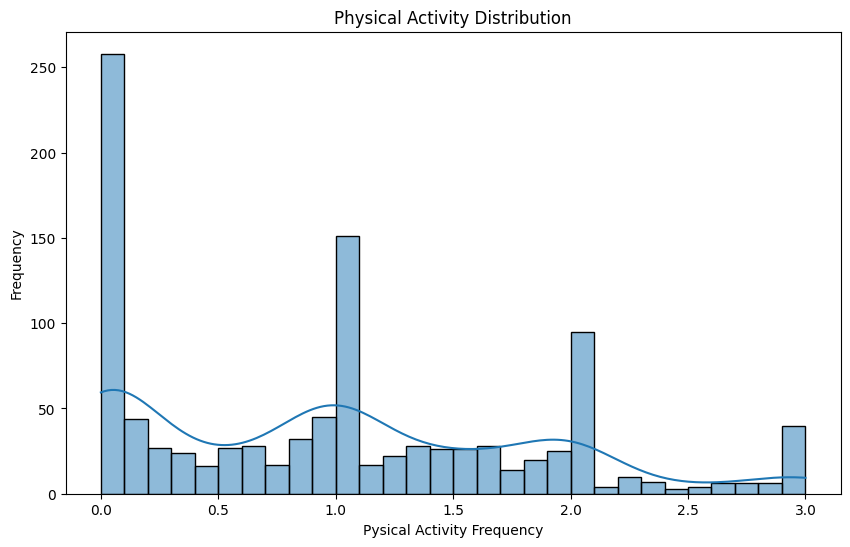

Pysical Activity Frequency Skewness: 0.55


In [55]:
#Age distribution
#Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x= 'Physical_activity_frequency', kde=True, bins=30)
plt.title('Physical Activity Distribution')
plt.xlabel('Pysical Activity Frequency')
plt.ylabel('Frequency')
plt.show()

Physical_activity_frequency_skew = skew(df['Physical_activity_frequency'].dropna())
print(f"Pysical Activity Frequency Skewness: {Physical_activity_frequency_skew:.2f}")

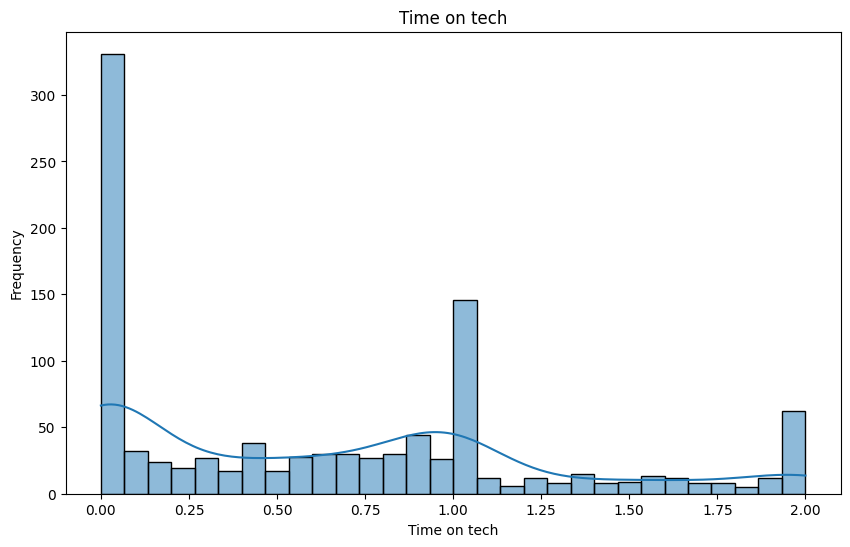

Time on tech Skewness: 0.66


In [56]:
#Age distribution
#Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x= 'Time_spent_on_tech', kde=True, bins=30)
plt.title('Time on tech')
plt.xlabel('Time on tech')
plt.ylabel('Frequency')
plt.show()

Time_spent_on_tech_skew = skew(df['Time_spent_on_tech'].dropna())
print(f"Time on tech Skewness: {Time_spent_on_tech_skew:.2f}")

##### Bivariate data Analysis

###### Categorical

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Obesity_level', data=df, hue_order=order)
plt.title('Obesity level by sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Obesity Level')  # puts legend outside
plt.tight_layout()
plt.show()

pd.crosstab(df['Gender'], df['Obesity_level'])

NameError: name 'order' is not defined

<Figure size 1000x600 with 0 Axes>

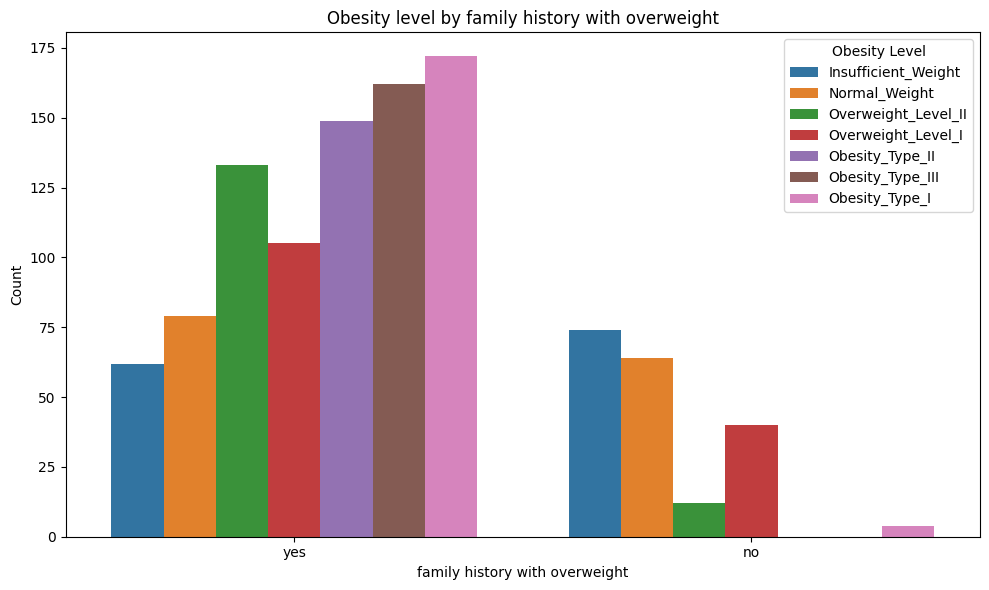

Obesity_level,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
family_history_with_overweight,,,,,,,
no,74,64,4,0,0,40,12
yes,62,79,172,149,162,105,133


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='family_history_with_overweight', hue='Obesity_level', data=df, hue_order=order)
plt.title('Obesity level by family history with overweight')
plt.xlabel('family history with overweight')
plt.ylabel('Count')
plt.legend(title='Obesity Level')  # puts legend outside
plt.tight_layout()
plt.show()

pd.crosstab(df['family_history_with_overweight'], df['Obesity_level'])

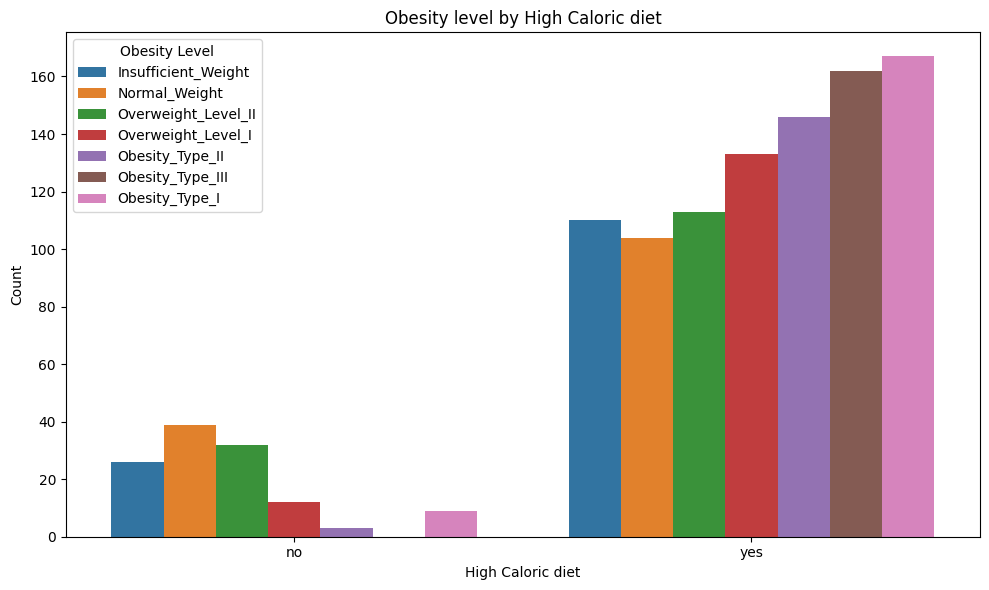

Obesity_level,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
High_calorie_diet,,,,,,,
no,26,39,9,3,0,12,32
yes,110,104,167,146,162,133,113


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='High_calorie_diet', hue='Obesity_level', data=df, hue_order=order)
plt.title('Obesity level by High Caloric diet')
plt.xlabel('High Caloric diet')
plt.ylabel('Count')
plt.legend(title='Obesity Level')  # puts legend outside
plt.tight_layout()
plt.show()

pd.crosstab(df['High_calorie_diet'], df['Obesity_level'])

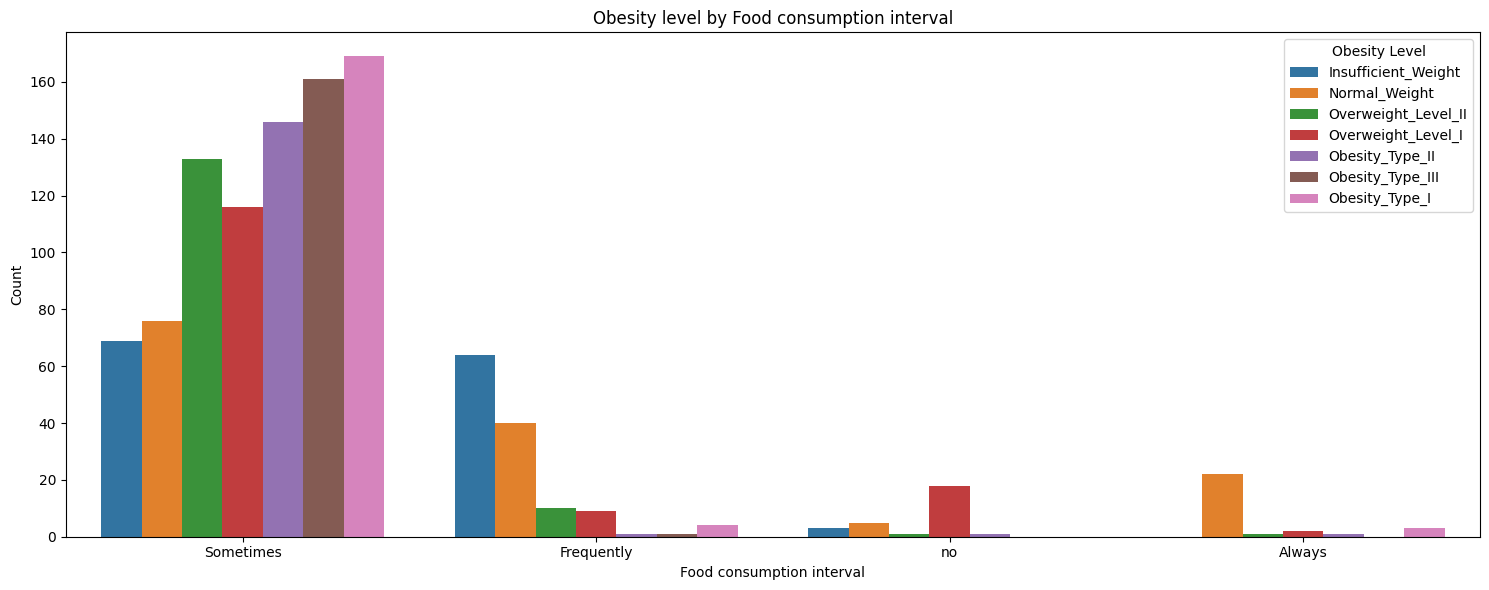

Obesity_level,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Food_consumption_interval,,,,,,,
Always,0,22,3,1,0,2,1
Frequently,64,40,4,1,1,9,10
Sometimes,69,76,169,146,161,116,133
no,3,5,0,1,0,18,1


In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Food_consumption_interval', hue='Obesity_level', data=df, hue_order=order)
plt.title('Obesity level by Food consumption interval')
plt.xlabel('Food consumption interval')
plt.ylabel('Count')
plt.legend(title='Obesity Level')  # puts legend outside
plt.tight_layout()
plt.show()

pd.crosstab(df['Food_consumption_interval'], df['Obesity_level'])

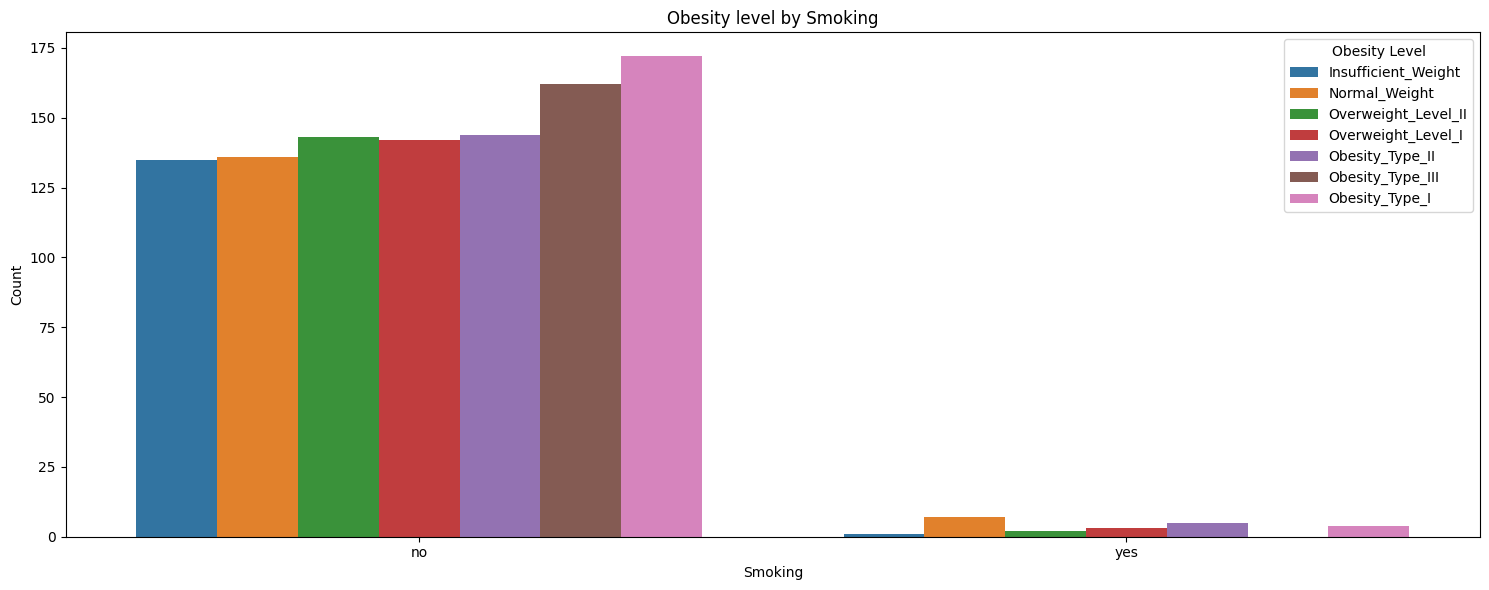

Obesity_level,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Smoking,,,,,,,
no,135,136,172,144,162,142,143
yes,1,7,4,5,0,3,2


In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Smoking', hue='Obesity_level', data=df, hue_order=order)
plt.title('Obesity level by Smoking')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Obesity Level')  # puts legend outside
plt.tight_layout()
plt.show()

pd.crosstab(df['Smoking'], df['Obesity_level'])

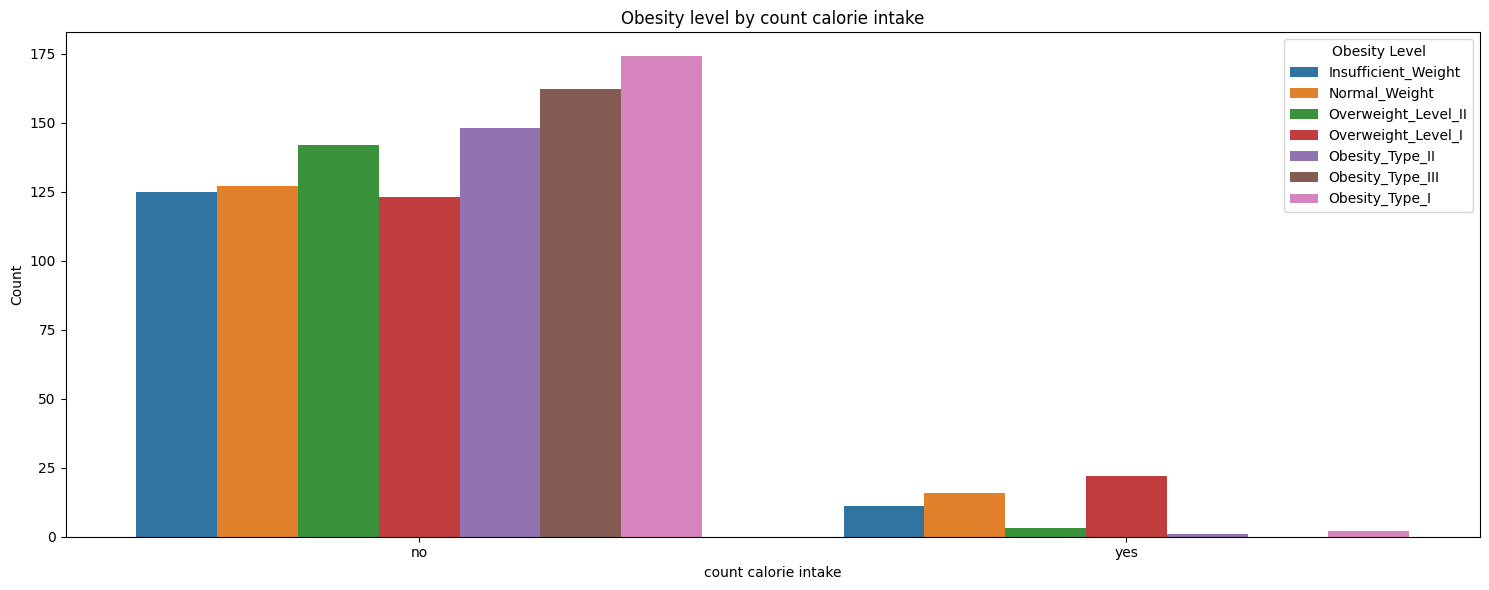

Obesity_level,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Count_Calorie_intake,,,,,,,
no,125,127,174,148,162,123,142
yes,11,16,2,1,0,22,3


In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Count_Calorie_intake', hue='Obesity_level', data=df, hue_order=order)
plt.title('Obesity level by count calorie intake')
plt.xlabel('count calorie intake')
plt.ylabel('Count')
plt.legend(title='Obesity Level')  # puts legend outside
plt.tight_layout()
plt.show()

pd.crosstab(df['Count_Calorie_intake'], df['Obesity_level'])

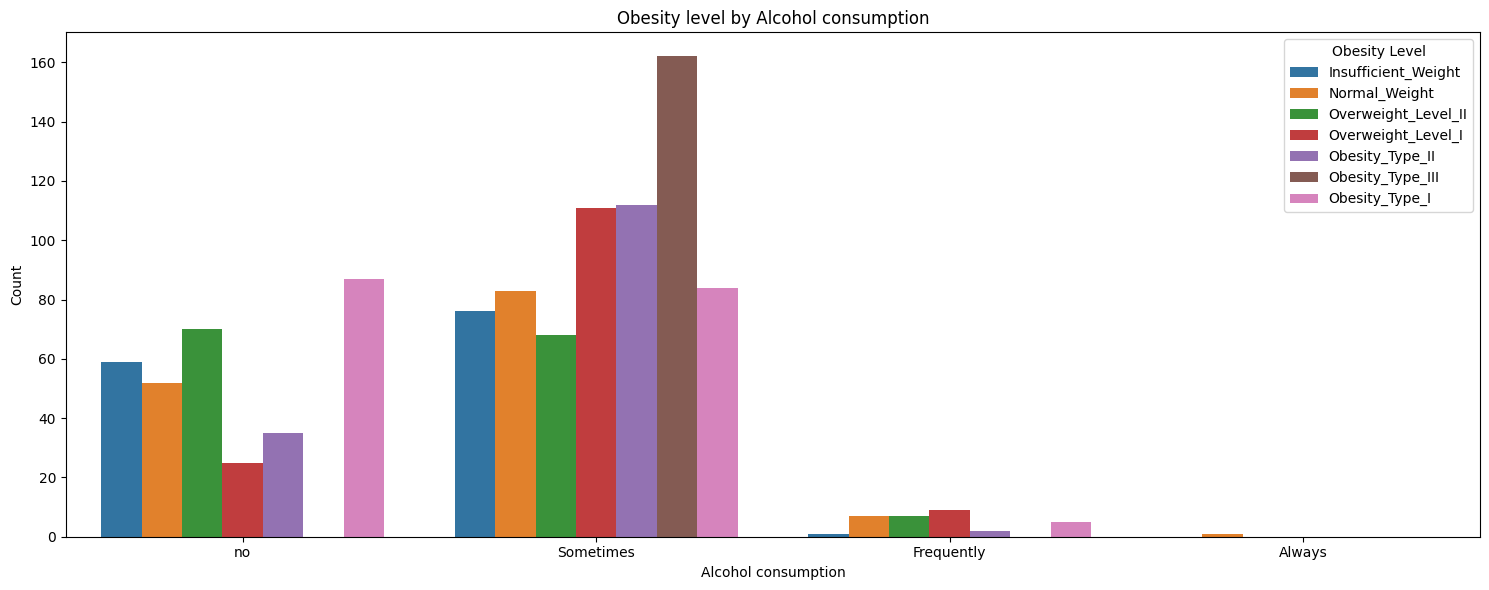

Obesity_level,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Alcohol_Consumption_Frequency,,,,,,,
Always,0,1,0,0,0,0,0
Frequently,1,7,5,2,0,9,7
Sometimes,76,83,84,112,162,111,68
no,59,52,87,35,0,25,70


In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Alcohol_Consumption_Frequency', hue='Obesity_level', data=df, hue_order=order)
plt.title('Obesity level by Alcohol consumption')
plt.xlabel('Alcohol consumption')
plt.ylabel('Count')
plt.legend(title='Obesity Level')  # puts legend outside
plt.tight_layout()
plt.show()

pd.crosstab(df['Alcohol_Consumption_Frequency'], df['Obesity_level'])

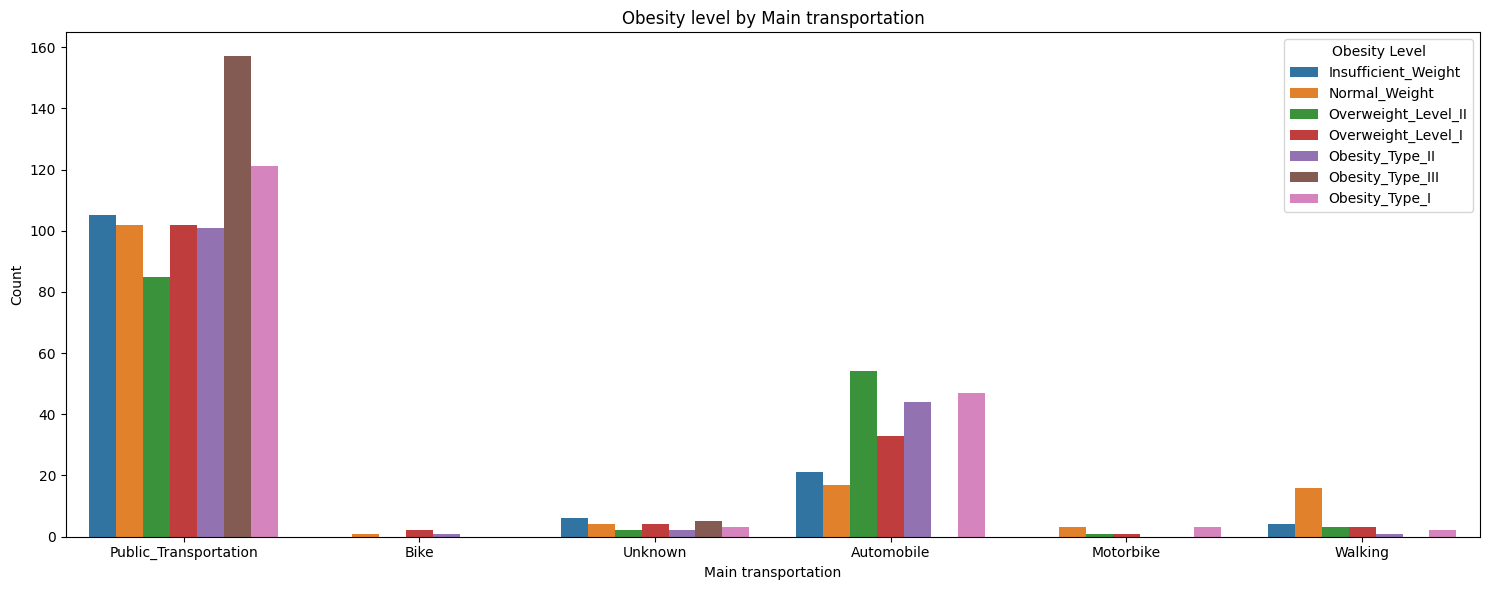

Obesity_level,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Main_Transportation,,,,,,,
Automobile,21,17,47,44,0,33,54
Bike,0,1,0,1,0,2,0
Motorbike,0,3,3,0,0,1,1
Public_Transportation,105,102,121,101,157,102,85
Unknown,6,4,3,2,5,4,2
Walking,4,16,2,1,0,3,3


In [ ]:
df_temp_2 = df.copy()
df_temp_2['Main_Transportation'] = df_temp_2['Main_Transportation'].fillna('Unknown')


plt.figure(figsize=(15, 6))
sns.countplot(x='Main_Transportation', hue='Obesity_level', data=df_temp_2, hue_order=order)
plt.title('Obesity level by Main transportation')
plt.xlabel('Main transportation')
plt.ylabel('Count')
plt.legend(title='Obesity Level')  # puts legend outside
plt.tight_layout()
plt.show()

pd.crosstab(df_temp_2['Main_Transportation'], df_temp_2['Obesity_level'])

###### Numerical

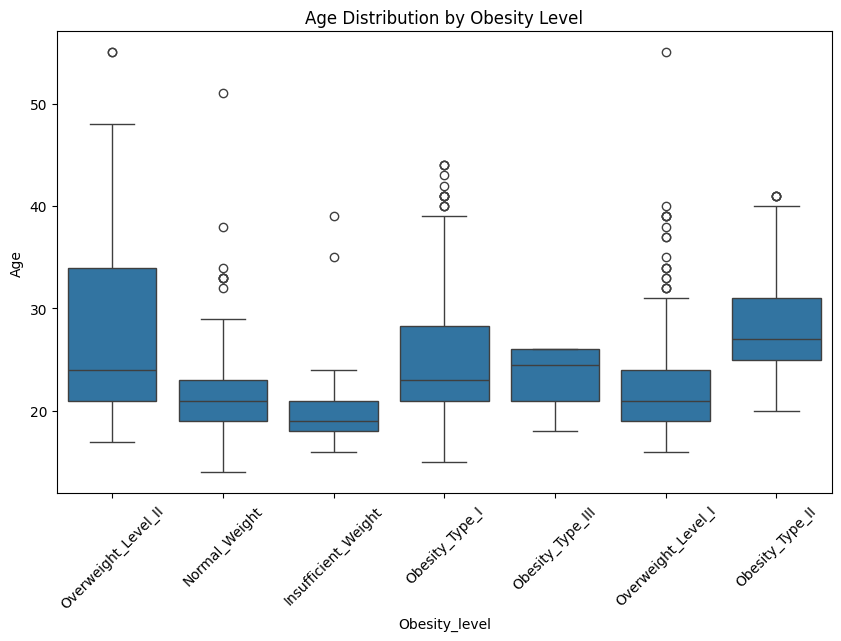

count    1056.000000
mean       24.235795
std         6.321129
min        14.000000
25%        20.000000
50%        23.000000
75%        26.000000
max        55.000000
Name: Age, dtype: float64

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Obesity_level', y='Age', data=df)
plt.xticks(rotation=45)
plt.title('Age Distribution by Obesity Level')
plt.show()

df['Age'].describe()

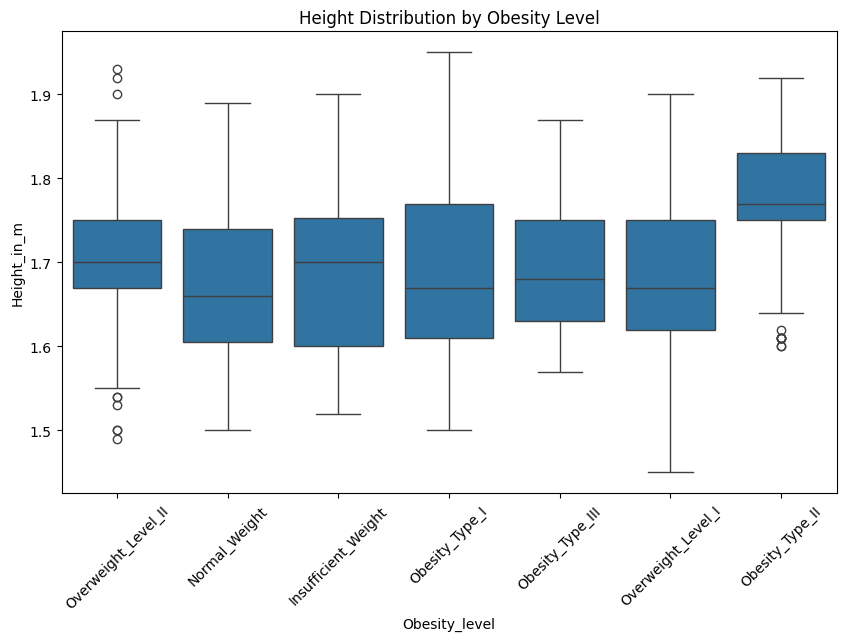

count    1056.000000
mean        1.700066
std         0.091560
min         1.450000
25%         1.630000
50%         1.700000
75%         1.760000
max         1.950000
Name: Height_in_m, dtype: float64

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Obesity_level', y='Height_in_m', data=df)
plt.xticks(rotation=45)
plt.title('Height Distribution by Obesity Level')
plt.show()

df['Height_in_m'].describe()

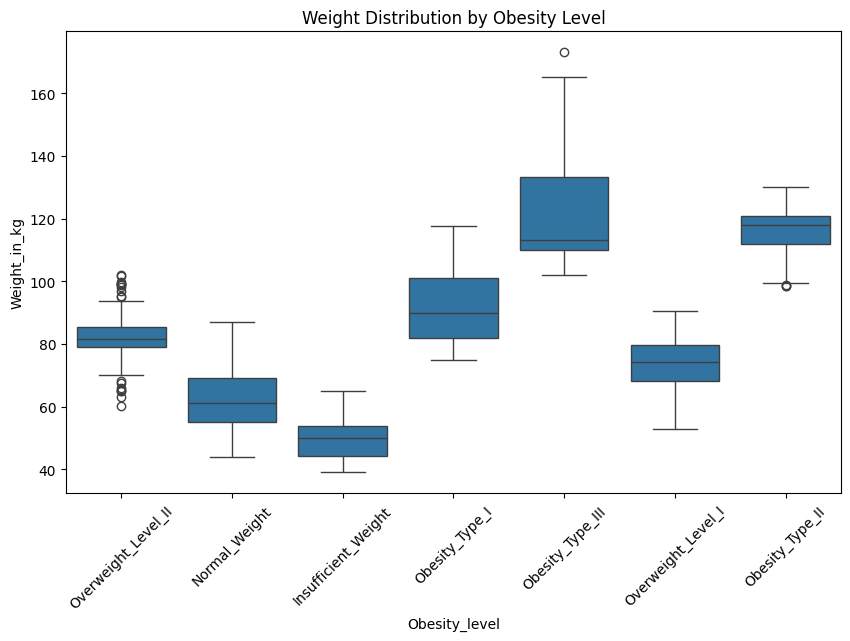

count    1056.000000
mean       86.497633
std        26.181219
min        39.000000
25%        66.000000
50%        82.635000
75%       107.965000
max       173.000000
Name: Weight_in_kg, dtype: float64

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Obesity_level', y='Weight_in_kg', data=df)
plt.xticks(rotation=45)
plt.title('Weight Distribution by Obesity Level')
plt.show()

df['Weight_in_kg'].describe()

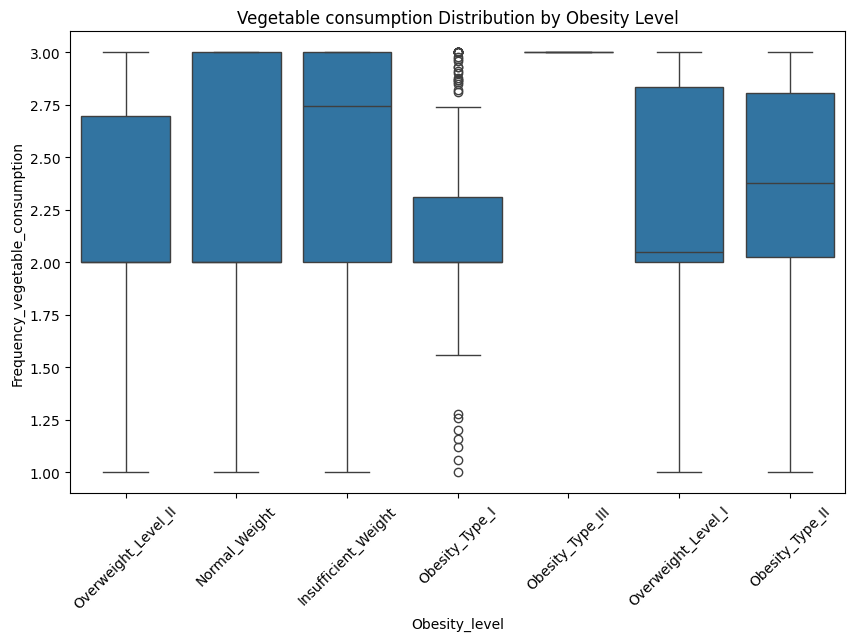

count    1019.000000
mean        2.421374
std         0.537591
min         1.000000
25%         2.000000
50%         2.390000
75%         3.000000
max         3.000000
Name: Frequency_vegetable_consumption, dtype: float64

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Obesity_level', y='Frequency_vegetable_consumption', data=df_temp_2)
plt.xticks(rotation=45)
plt.title('Vegetable consumption Distribution by Obesity Level')
plt.show()

df['Frequency_vegetable_consumption'].describe()

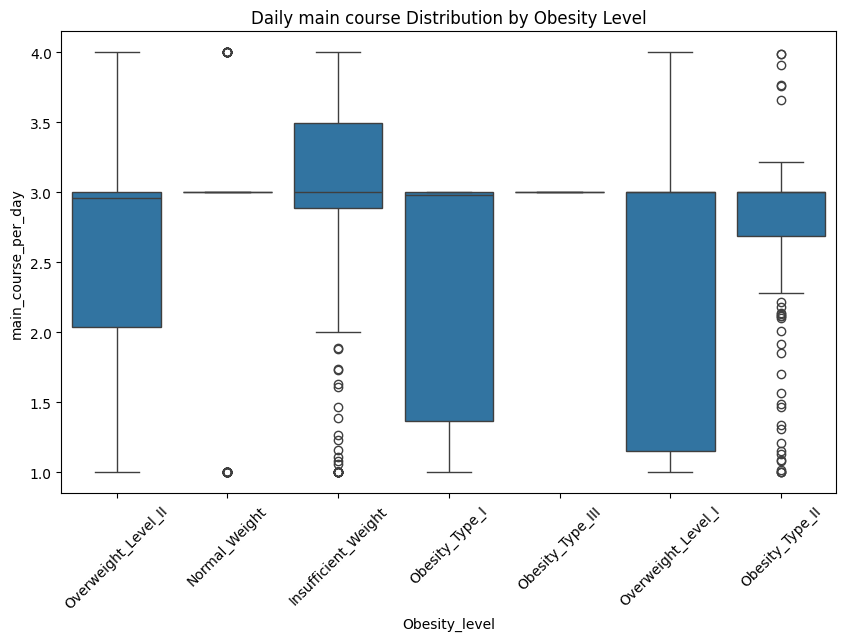

count    1056.000000
mean        2.651686
std         0.804457
min         1.000000
25%         2.525000
50%         3.000000
75%         3.000000
max         4.000000
Name: main_course_per_day, dtype: float64

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Obesity_level', y='main_course_per_day', data=df)
plt.xticks(rotation=45)
plt.title('Daily main course Distribution by Obesity Level')
plt.show()

df['main_course_per_day'].describe()

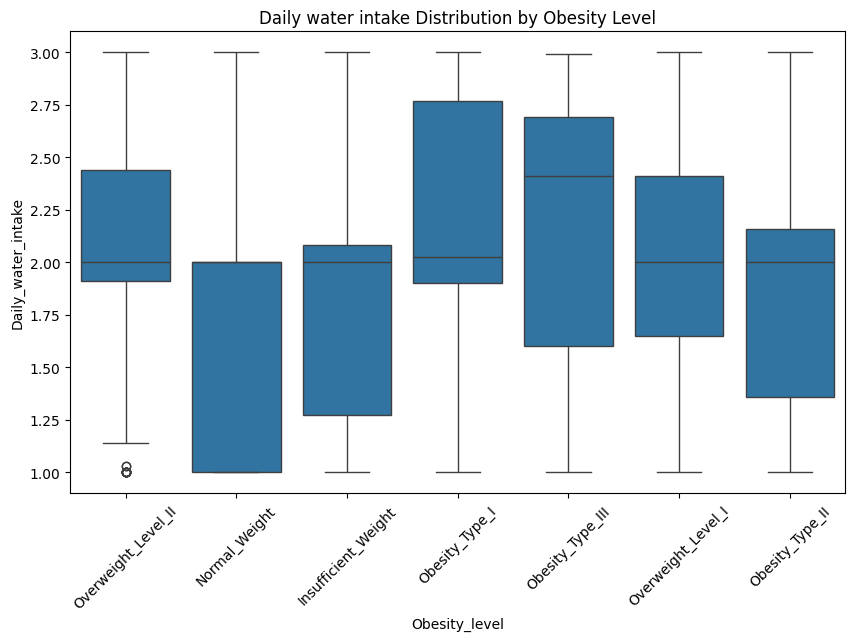

count    1056.000000
mean        1.998002
std         0.612930
min         1.000000
25%         1.530000
50%         2.000000
75%         2.442500
max         3.000000
Name: Daily_water_intake, dtype: float64

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Obesity_level', y='Daily_water_intake', data=df)
plt.xticks(rotation=45)
plt.title('Daily water intake Distribution by Obesity Level')
plt.show()

df['Daily_water_intake'].describe()

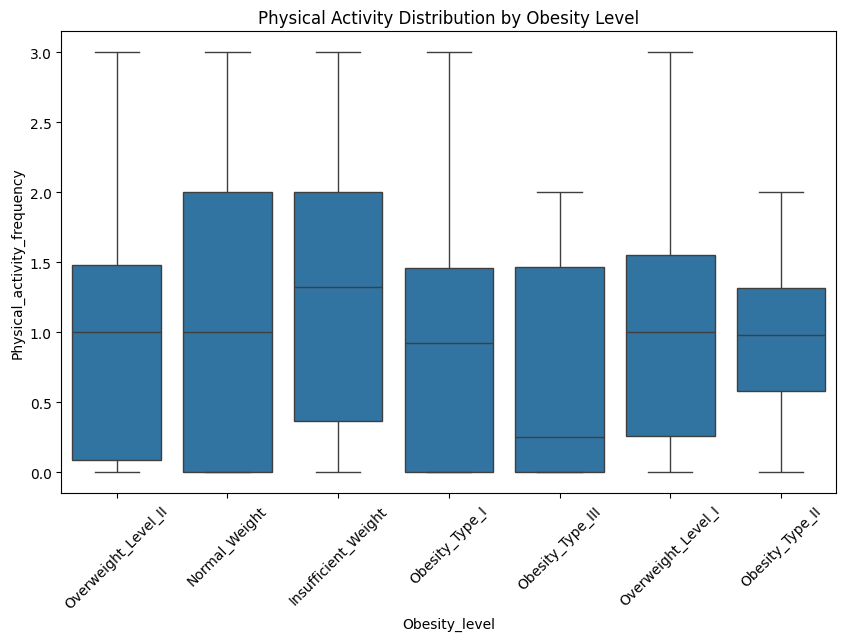

count    1056.000000
mean        0.987528
std         0.850452
min         0.000000
25%         0.110000
50%         1.000000
75%         1.602500
max         3.000000
Name: Physical_activity_frequency, dtype: float64

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Obesity_level', y='Physical_activity_frequency', data=df)
plt.xticks(rotation=45)
plt.title('Physical Activity Distribution by Obesity Level')
plt.show()

df['Physical_activity_frequency'].describe()

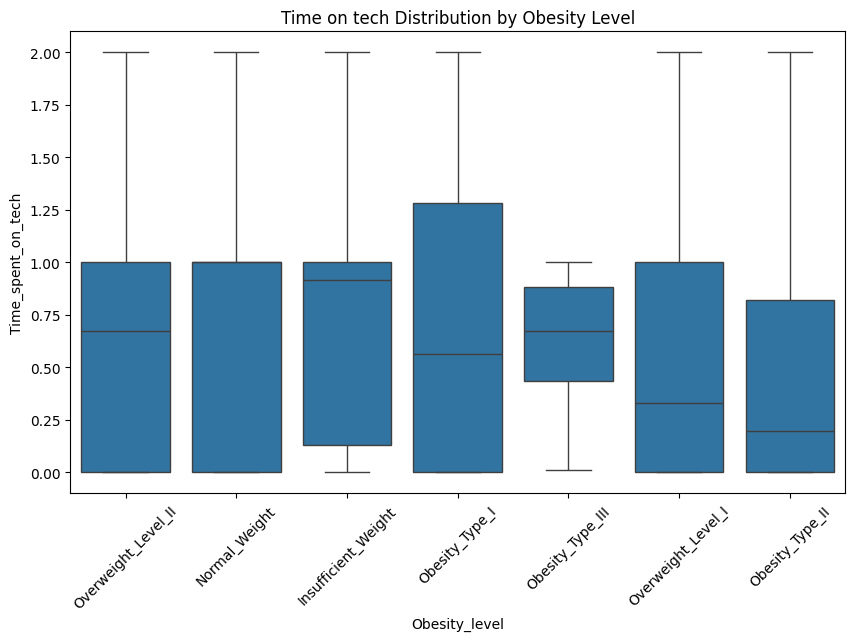

count    1056.000000
mean        0.642227
std         0.615533
min         0.000000
25%         0.000000
50%         0.583000
75%         1.000000
max         2.000000
Name: Time_spent_on_tech, dtype: float64

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Obesity_level', y='Time_spent_on_tech', data=df)
plt.xticks(rotation=45)
plt.title('Time on tech Distribution by Obesity Level')
plt.show()

df['Time_spent_on_tech'].describe()

## Data Pre-Processing

##### Data Cleaning

###### Handling duplicated values

In [60]:
df = df.drop_duplicates(keep='first')

In [61]:
df[df.duplicated()]

,Gender,Age,Height_in_m,Weight_in_kg,family_history_with_overweight,High_calorie_diet,Frequency_vegetable_consumption,main_course_per_day,Food_consumption_interval,Smoking,Daily_water_intake,Count_Calorie_intake,Physical_activity_frequency,Time_spent_on_tech,Alcohol_Consumption_Frequency,Main_Transportation,Obesity_level


###### Handling missing values

In [62]:
missing_values_count = df.isnull().sum()
missing_values_percentage = df.isnull().mean() * 100
data_types = df.dtypes
unique_values_count = df.nunique()

summary = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage of Missing Values': missing_values_percentage,
    'Data Type': data_types,
    'Unique Values': unique_values_count
})
summary

,Missing Values,Percentage of Missing Values,Data Type,Unique Values
Gender,0,0.000000,object,2
Age,0,0.000000,float64,36
Height_in_m,0,0.000000,float64,47
Weight_in_kg,0,0.000000,float64,715
family_history_with_overweight,0,0.000000,object,2
High_calorie_diet,0,0.000000,object,2
Frequency_vegetable_consumption,37,3.537285,float64,147
main_course_per_day,0,0.000000,float64,194
Food_consumption_interval,0,0.000000,object,4
Smoking,0,0.000000,object,2


In [63]:
df['Frequency_vegetable_consumption'] = df['Frequency_vegetable_consumption'].fillna(df['Frequency_vegetable_consumption'].mean())

C:\Users\ben\AppData\Local\Temp\ipykernel_10396\1421640015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Frequency_vegetable_consumption'] = df['Frequency_vegetable_consumption'].fillna(df['Frequency_vegetable_consumption'].mean())


In [64]:
df['Main_Transportation'] = df['Main_Transportation'].fillna(df['Main_Transportation'].mode()[0])

C:\Users\ben\AppData\Local\Temp\ipykernel_10396\3619504306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Main_Transportation'] = df['Main_Transportation'].fillna(df['Main_Transportation'].mode()[0])


In [65]:
missing_values_count = df.isnull().sum()
missing_values_count

Gender                             0
Age                                0
Height_in_m                        0
Weight_in_kg                       0
family_history_with_overweight     0
High_calorie_diet                  0
Frequency_vegetable_consumption    0
main_course_per_day                0
Food_consumption_interval          0
Smoking                            0
Daily_water_intake                 0
Count_Calorie_intake               0
Physical_activity_frequency        0
Time_spent_on_tech                 0
Alcohol_Consumption_Frequency      0
Main_Transportation                0
Obesity_level                      0
dtype: int64

###### Encoding and scaling

In [67]:
# 2. Encode the target label
label_encoder = LabelEncoder()
df['Obesity_level'] = label_encoder.fit_transform(df['Obesity_level'])

# 3. Define features
categorical_cols = [
    'Gender', 'family_history_with_overweight', 'High_calorie_diet',
    'Food_consumption_interval', 'Smoking', 'Count_Calorie_intake',
    'Alcohol_Consumption_Frequency', 'Main_Transportation'
]

numerical_cols = [
    'Age', 'Height_in_m', 'Weight_in_kg', 'Frequency_vegetable_consumption',
    'main_course_per_day', 'Daily_water_intake',
    'Physical_activity_frequency', 'Time_spent_on_tech'
]

X = df[categorical_cols + numerical_cols]
y = df['Obesity_level']
# 5. Preprocessing transformer

# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42,
                                 use_label_encoder=False, eval_metric='mlogloss'))
])

C:\Users\ben\AppData\Local\Temp\ipykernel_10396\3013360326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Obesity_level'] = label_encoder.fit_transform(df['Obesity_level'])


## Modelling

###### Modelling

In [68]:
# 6. Pipelines for each model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.79      0.93      0.85        28
           2       0.97      0.94      0.96        35
           3       1.00      1.00      1.00        30
           4       1.00      0.97      0.98        33
           5       1.00      0.79      0.88        28
           6       0.81      0.90      0.85        29

    accuracy                           0.93       210
   macro avg       0.93      0.93      0.93       210
weighted avg       0.94      0.93      0.93       210

Confusion Matrix:
 [[26  1  0  0  0  0  0]
 [ 1 26  0  0  0  0  1]
 [ 0  0 33  0  0  0  2]
 [ 0  0  0 30  0  0  0]
 [ 0  1  0  0 32  0  0]
 [ 0  3  0  0  0 22  3]
 [ 0  2  1  0  0  0 26]]


In [69]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42,
                                 use_label_encoder=False, eval_metric='mlogloss'))
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

c:\Users\ben\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:36:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.84      0.93      0.88        28
           2       1.00      0.97      0.99        35
           3       0.97      1.00      0.98        30
           4       1.00      0.97      0.98        33
           5       0.96      0.89      0.93        28
           6       0.93      0.93      0.93        29

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210

Confusion Matrix:
 [[26  1  0  0  0  0  0]
 [ 1 26  0  0  0  1  0]
 [ 0  0 34  0  0  0  1]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0  1 32  0  0]
 [ 0  2  0  0  0 25  1]
 [ 0  2  0  0  0  0 27]]


In [70]:
import pickle

# Save the pipeline to a .pkl file
with open('xgb_pipeline.pkl', 'wb') as file:
    pickle.dump(xgb_pipeline, file)